6200.882664000001,[-35.141 -19.177]
2343.2272537799995,[-14.1979 -25.6929]
896.0072681699995,[ -0.98045 -27.78721]
346.4494391792219,[  7.159451 -29.108955]
137.76218616128733,[ 12.1755661 -29.9229451]
58.51598579737126,[ 15.26663417 -30.42455661]
28.42329838438493,[ 17.17143616 -30.73366342]
16.99600178748655,[ 18.34522804 -30.92414362]
12.656638349406443,[ 19.06855119 -31.0415228 ]
11.008822972595706,[ 19.51428299 -31.11385512]
10.383087065751425,[ 19.78895531 -31.1584283 ]
10.145472202688282,[ 19.95821601 -31.18589553]
10.055241128314972,[ 20.06251916 -31.2028216 ]
10.02097708153942,[ 20.12679366 -31.21325192]
10.007965766872148,[ 20.16640139 -31.21967937]
10.003024893703262,[ 20.19080877 -31.22364014]
10.001148663030552,[ 20.20584927 -31.22608088]
10.00043618946224,[ 20.21511765 -31.22758493]
10.000165637129347,[ 20.22082908 -31.22851177]
10.000062898490206,[ 20.22434863 -31.22908291]
10.000023884862566,[ 20.22651747 -31.22943486]
10.000009069957926,[ 20.22785397 -31.22965175]
10.0

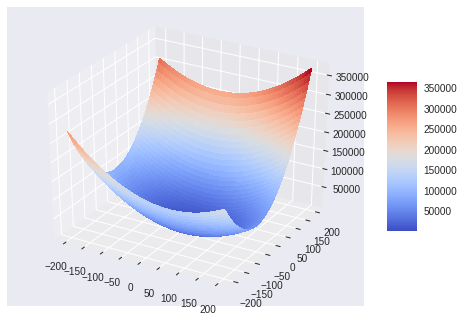

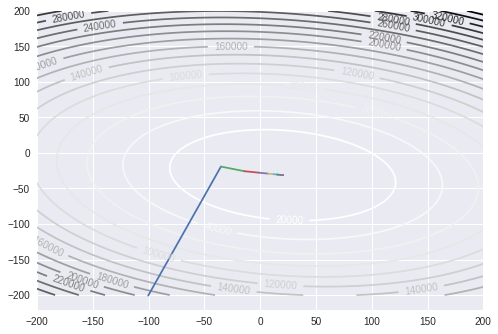

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize


# Plot the surface

# f = 2*(X-a).^2 + 5*(Y-b).^2 + (X-a).*(Y-b) + c;

def fEval(x, y):
    return 2*(x-20.23)**2 + 5*(y+31.23)**2 + (x-20.23)*(y+31.23) + 10

def objFunc1(params):
    x = params[0]
    y = params[1]
    return fEval(x,y)

X = np.linspace(-200,200, 100)
Y = np.linspace(-200,200, 100)
X, Y =np.meshgrid(X,Y)

Z=fEval(X,Y)

fig=plt.figure()
ax=fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)


# Basic contour plot
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, 20)
fmt = '%1.0f'

ax.clabel(CS, inline=1, fmt=fmt,fontsize=10)

"""
# Search --- fmin
tol=1e-6
params=[100, 100]
params = scipy.optimize.fmin(objFunc1, params, xtol=tol, ftol=tol, maxiter=500, maxfun=50000)
print("x={},y={},and z={}".format(params[0], params[1], fEval(params[0], params[1])))
"""

# Simple code on Gradient Descent
# Finding its global minimum using GD
# starting point x_i = [-100.3 - 200.7]
# learning rate: test it by using different learning rates

X_i = np.array([-100.3, -200.7])

def gradientF(X):
    x = X[0]
    y = X[1]
    return  np.array([4.0*(x-20.23) + (y+31.23), 10.0*(y+31.23) + (x-20.23)])


#g1 = 0.5
#g1 = 0.07
#g1 = 0.01
g1 = 0.1
#g1 = 1
#g1 = 10

nIters = 300

for i in range (nIters):
    #quiver(x_i(1), x_i(2), -g1 * delF(1), -g1 * delF(2));
    X_pre = X_i
    X_i = X_i - g1 * gradientF(X_i)
    plt.plot([X_pre[0],X_i[0]], [X_pre[1],X_i[1]])
#    plt.plot(X_i[0], X_i[1], 'o', 'LineWidth', 2, 'MarkerEdgeColor', 'k', 'MarkerFaceColor', 'g', 'MarkerSize', 3)
    x = X_i[0]
    y = X_i[1]
    fF = fEval(x, y)
    print("{},{}".format(fF, X_i))
plt.show()
